<a href="https://colab.research.google.com/github/SaraF-lab/a/blob/main/osc_cuantico_y_clasico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

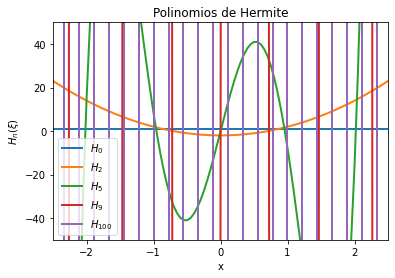

In [80]:
#Librerias
import matplotlib
import matplotlib.pyplot as plt 
import numpy
import numpy.polynomial.hermite as Herm

##Definición de las constantes
m=1.
w=1.
hbar=1.

#Dandole rango a x
dx = 0.05
x_lim = 15.5
x = numpy.arange(-x_lim,x_lim,dx)

#Obteniendo los polinomios de Hermite
def hermite(x, n):
    xi = numpy.sqrt(m*w/hbar)*x #Se define xi
    herm_coef = numpy.zeros(n+1) #Se crea un arreglo de ceros con n+1 elementos
    herm_coef[n] = 1
    return Herm.hermval(xi, herm_coef) #Utilizando la función Herm y guardando los polinomios

#Graficando algunos de los polinomios para observar el funcionamiento
plt.figure()
plt.plot(x, hermite(x,0), linewidth=2,label=r"$H_0$")
plt.plot(x, hermite(x,2), linewidth=2,label=r"$H_2$")
plt.plot(x, hermite(x,5), linewidth=2,label=r"$H_5$")
plt.plot(x, hermite(x,9), linewidth=2,label=r"$H_9$")
plt.plot(x, hermite(x,100), linewidth=2,label=r"$H_{100}$")

#Configurando los ejes
plt.xlim([-2.5,2.5])
plt.ylim([-50,50])

#Poniendo nombres a los ejes y un título
plt.xlabel("x")
plt.ylabel(r"$H_n(\xi)$")
plt.title(r"Polinomios de Hermite")
plt.legend()
plt.show()

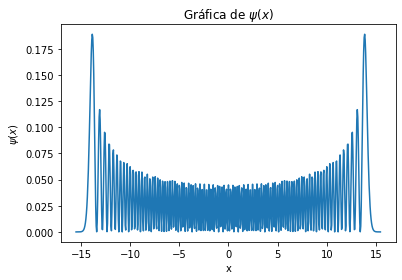

In [81]:
#Utilizando el procedimiento anterior para la obtención de los polinomios
def hermite(x, n):
    xi = numpy.sqrt(m*w/hbar)*x
    herm_coef = numpy.zeros(n+1)
    herm_coef[n] = 1
    return Herm.hermval(xi, herm_coef)

#Obteniendo los estados estacionarios  
def estado_estacionario(x,n):
    xi = numpy.sqrt(m*w/hbar)*x
    c = 1./math.sqrt(2.**n * math.factorial(n)) * (m*w/(numpy.pi*hbar))**(0.25)
    psi = c * numpy.exp(- xi**2 / 2) * hermite(x,n)
    return psi #Se guardan

#Se grafican para comprobarlos
plt.figure()
plt.plot(x, estado_estacionario(x,100)**2)
plt.xlabel(r"x")
plt.ylabel(r"$\psi(x)$")
plt.title(r"Gráfica de $\psi (x)$")
plt.show()

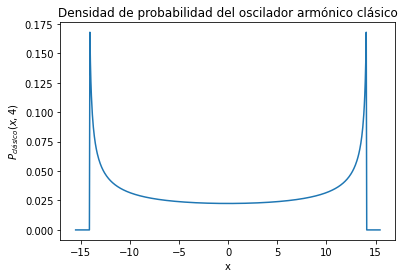

In [83]:
#Obteniendolo para el oscilador clásico
def clasico_P(x,n):
    E = hbar*w*(n+0.5)
    x_max = numpy.sqrt(2*E/(m*w**2))
    clasico_prob = numpy.zeros(x.shape[0]) #Arreglo a llenar
    x_d = abs(x) < (x_max - 0.078)
    clasico_prob[x_d] = 1./numpy.pi/numpy.sqrt(x_max**2-x[x_d]*x[x_d])
    return clasico_prob #Se guarda

#Grafiacandolo
plt.figure()
plt.plot(x, clasico_P(x,100))
plt.xlabel(r"x")
plt.ylabel(r"$P_{clásico}(x,4)$")
plt.title(r"Densidad de probabilidad del oscilador armónico clásico")
plt.show()

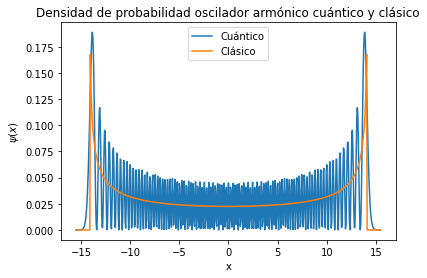

In [85]:
#Uniendo todo lo anterior
def hermite(x, n):
    xi = numpy.sqrt(m*w/hbar)*x
    herm_coef = numpy.zeros(n+1)
    herm_coef[n] = 1
    return Herm.hermval(xi, herm_coef)
  
def estado_estacionario(x,n):
    xi = numpy.sqrt(m*w/hbar)*x
    c = 1./math.sqrt(2.**n * math.factorial(n)) * (m*w/(numpy.pi*hbar))**(0.25)
    psi = c * numpy.exp(- xi**2 / 2) * hermite(x,n)
    return psi

def clasico_P(x,n):
    E = hbar*w*(n+0.5)
    x_max = numpy.sqrt(2*E/(m*w**2))
    clasico_prob = numpy.zeros(x.shape[0])
    x_d = abs(x) < (x_max - 0.078)#0.025
    clasico_prob[x_d] = 1./numpy.pi/numpy.sqrt(x_max**2-x[x_d]*x[x_d])
    return clasico_prob

#Graficandolo
plt.figure()
plt.plot(x, (estado_estacionario(x,100))**2 ,label=r"Cuántico")
plt.plot(x, clasico_P(x,100), label=r"Clásico")
plt.xlabel(r"x")
plt.ylabel(r"$\psi(x)$")
plt.title(r"Densidad de probabilidad oscilador armónico cuántico y clásico")
plt.legend()
plt.savefig("osciladores.jpeg")
plt.show()